# Building a Toffoli Gate.
Follow this notebook to create a toffoli gate from.

## Create the circuit.

In [1]:
#Begin with some simple imports
import numpy as np
from qiskit import *

We want to perform the Toffoli gate action: if the first two bits are both set to 1, it inverts the third bit, otherwise all bits stay the same. 

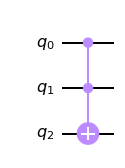

In [2]:
#Using the inbuilt Toffoli gate.
toff = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
toff.ccx(a,b,t)
toff.draw('mpl')

It is possible to create the toffoli gate with many different combinations of gates. You can create it using 2 controlled Hadamard gates `QuantumCircuit.ch(control,target)` & one controlled Z gate `QuantumCircuit.cz(control,target)`. 

Create your circuit in the box below. Test your gate by bit flipping the control qubits with a Pauli X-gate.

Think about this a little - what would two Hadamards & a Z gate do to a qubit?

In [3]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

#Now create your circuit here:

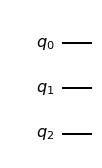

In [4]:
circ.draw('mpl')

## Simulate the circuit.

### Statevector Backend:

In [5]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution 
job = backend.run(circ)

# Get the state vector for the quantum circuit
outstate = job.result().get_statevector(circ)

### Unitary Backend:
A visualisation of the circuit you've created.

In [6]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = backend.run(circ)
result = job.result()

# Show the results
print(result.get_unitary(circ, decimals=3))

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


### OpenQASM Backend:
Now simulate a *measurement* of the qubits in the register. Add a 3 qubit classical register, and map the three qubit measurements to the classical bits.

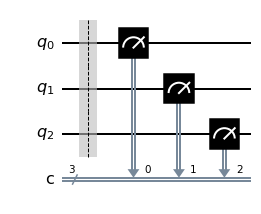

In [7]:
# Create a Quantum Circuit with 3 quantum bits & 3 classical bits.
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
circ.add_register(meas.cregs[0])
qc = circ.compose(meas)

#drawing the circuit
qc.draw('mpl')

In [8]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

Now we access the counts from the circuit via `get_counts(qc)`. We can plot this in a nice histogram with `plot_histogram`:

{'000': 1024}


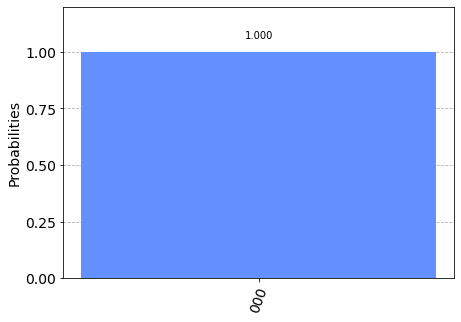

In [9]:
from qiskit.visualization import plot_histogram

counts = result_sim.get_counts(qc)
print(counts)

plot_histogram(counts)